# STEP 1. 비즈니스 이해

본 분석의 목적은 은행의 마케팅 캠페인이 고객의 대출 전환 및 신규 대출 유치에 미치는 영향을 평가하는 것이다. 이를 위해 고객의 인구통계학적 특성, 대출 조건 등 다양한 요인이 캠페인 참여에 미치는 영향을 분석하여, 효과적인 마케팅 전략을 도출하고 향후 고객 확보 및 유지 방안을 제안하고자 한다.

< 데이터 정보 > </br>
: 본래 UCI 머신러닝 저장소에 업로드된 고전적 마케팅 은행 데이터셋. 은행의 미래 마케팅 캠페인을 개선하기 위해 미래 전략을 모색하기 위해 분석해야 할 금융 기관의 마케팅 캠페인에 대한 정보를 제공함. 

< 컬럼 정보 > 
1. age : 나이
2. job : 직업 (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown')
3. marital : 결혼여부 (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education : 교육 (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default : 신용불이행 여부
6. balance : 연간 평균 잔고
7. housing : 주택대출 여부
8. loan : 개인대출 여부
9. contact : 연락 통신 유형 (categorical: 'cellular','telephone')
10. day : 마지막으로 연락한 일 
11. month : 마지막으로 연락한 달 (categoty : 'jan','feb','mar'...'nov','dec')
12. duration : 마지막으로 접촉한 시간 (초 단위, 해당 속성은 출력 목표에 큰 영향을 미침.(ex. duration이 0이면 y='no'). 하지만 호출이 끝난 후에는 y가 명확하게 알려져 있음. 따라서 해당 입력은 벤치마크 목적으로만 사용되어야 하며, 현실적인 예측 모델을 갖추기 위한 의도로 폐기되어야 함. 
13. campaign : 해당 캠페인 동안 수행된 해당 고객과 연관된 연락처 수 (마지막 연락처 포함)
14. pdays : 이전 캠페인에서 클라이언트에게 마지막으로 연락한 후 경과한 일수 (-1은 클라이언트에게 이전에 연락하지 않았음을 의미)
15. previous : 해당 캠페인 전에 수행된 연락처와 이 클라이언트에 대한 연락처 수 
16. poutcome : 이전 마케팅 캠페인의 결과 ('failure', 'nonexistent', 'success')
17. deposit : 정기예금 가입 여부

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap

# STEP 2. 데이터 이해

In [2]:
bank = pd.read_csv("C:/Users/y5747/OneDrive/바탕 화면/혜은 파일/bank.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

결측치가 없지만 job, marital, education, contact, poutcome 등에서 unknown을 채워넣었기 때문일 수 있음. </br>
unknown을 삭제할지 말지의 여부를 데이터 탐색 과정에서 확인한 후 결정해주어야 함. 

# STEP 3. 데이터 탐색

### age 데이터 탐색 

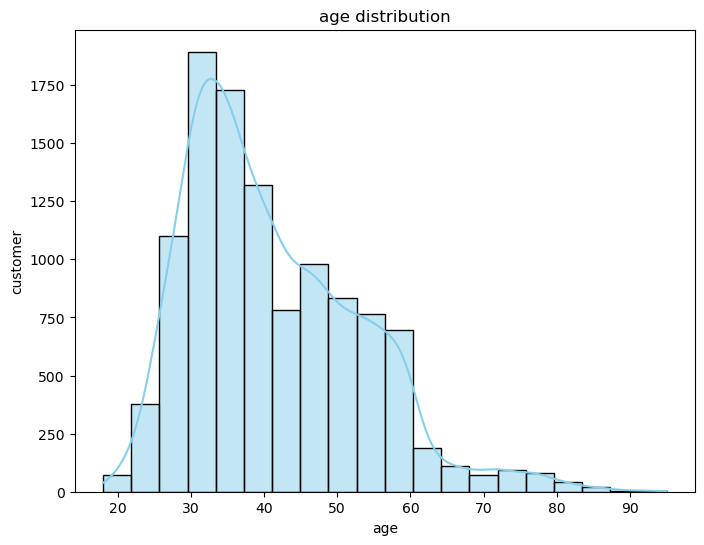

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(bank['age'], bins=20, kde=True, color='skyblue')
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('customer')
plt.show()

* 대부분의 고객이 상대적으로 젊은 연령대에 몰려 있고, 나이가 많을수록 고객 수가 점차 감소
* 커널 밀도 추정선을 통해 이상적인 정규분포보다 비대칭성이 크다는 것을 알 수 있음

### job 데이터 탐색 

In [6]:
bank['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

C:\Users\y5747\AppData\Local\Temp\ipykernel_10480\975560433.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')


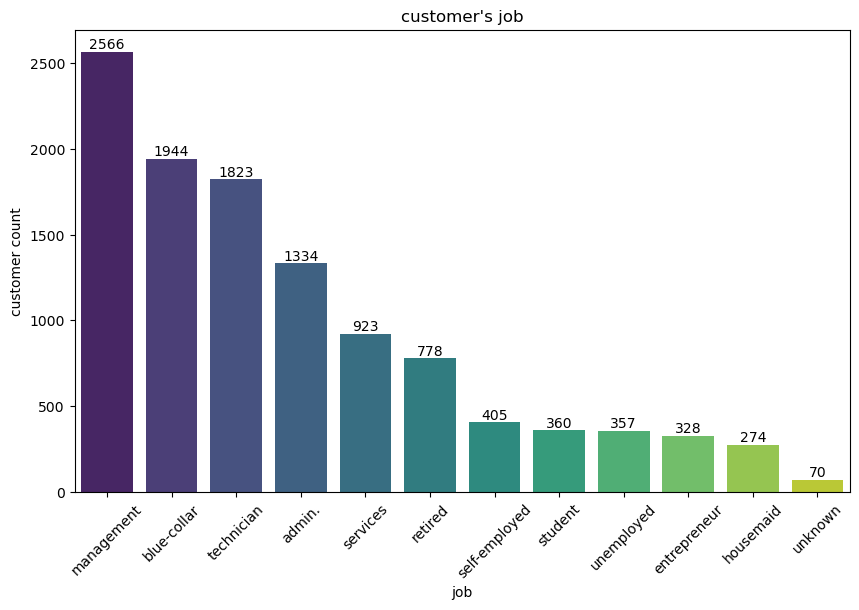

In [7]:
job_counts = bank['job'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("customer's job")
plt.xlabel('job')
plt.ylabel('customer count')
for i, value in enumerate(job_counts.values):
    plt.annotate(str(value), (i, value), ha='center', va='bottom', fontsize=10, color='black')
plt.show()

* Management가 가장 큰 비중을 차지하고 Blue-collar, Technician도 높은 비율을 보였음.
* 가장 적은 비율을 보인 것은 Unknown

### marital 데이터 탐색

In [8]:
bank['marital'].value_counts()

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

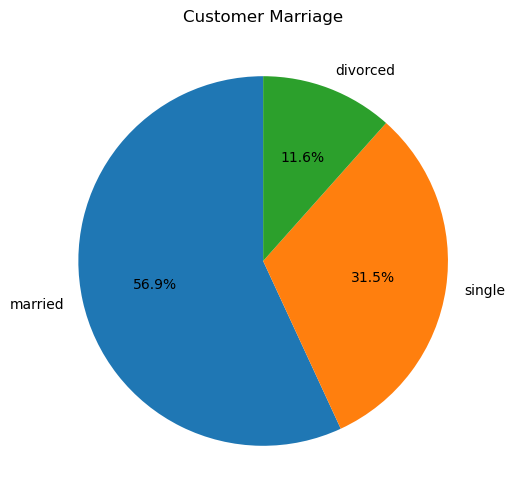

In [9]:
marital_counts = bank['marital'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(marital_counts, labels=marital_counts.index, startangle=90, autopct='%.1f%%')
ax.set_title('Customer Marriage')
plt.show()


기혼이 56.9% 가장 높은 비율을 차지하고 Single이 31.5%로 두 번째 큰 비율을 차지하였음. 

### education 데이터 탐색 

In [10]:
bank['education'].value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

### contact 데이터 탐색 

In [11]:
bank['contact'].value_counts()

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

### poutcome 데이터 탐색 

In [12]:
bank['poutcome'].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

### pdays 데이터 탐색

In [13]:
bank['pdays'].value_counts()

pdays
-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: count, Length: 472, dtype: int64

### unknown 값에 대한 처리 결정

In [14]:
# job과 marital에 대한 정보가 둘 다 unknown으로 처리된 고객
bank.loc[(bank['job'] == 'unknown') & (bank['marital'] == 'unknown')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [15]:
# job과 education에 대한 정보가 둘 다 unknown으로 처리된 고객
bank.loc[(bank['job'] == 'unknown') & (bank['education'] == 'unknown')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
668,52,unknown,married,unknown,no,5361,no,no,cellular,5,aug,607,3,-1,0,unknown,yes
861,60,unknown,married,unknown,no,17297,no,no,cellular,26,aug,664,11,-1,0,unknown,yes
1401,58,unknown,married,unknown,no,68,no,no,cellular,2,apr,268,1,-1,0,unknown,yes
1592,45,unknown,divorced,unknown,no,0,no,no,cellular,21,apr,278,3,-1,0,unknown,yes
1598,41,unknown,single,unknown,no,942,no,no,cellular,22,apr,219,1,-1,0,unknown,yes
1674,47,unknown,married,unknown,no,677,no,no,cellular,30,apr,900,2,86,2,failure,yes
2440,65,unknown,married,unknown,no,4717,no,no,telephone,6,aug,256,1,-1,0,unknown,yes
2736,54,unknown,married,unknown,no,895,no,no,cellular,7,oct,335,1,-1,0,unknown,yes
2826,41,unknown,single,unknown,no,942,no,no,cellular,27,oct,143,1,188,1,success,yes
3102,42,unknown,single,unknown,no,942,no,no,cellular,27,jan,245,1,92,2,success,yes


In [16]:
# marital과 education에 대한 정보가 둘 다 unknown으로 처리된 고객
bank.loc[(bank['marital'] == 'unknown') & (bank['education'] == 'unknown')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


* contact 컬럼과 poutcome 컬럼에서의 'unknown'값이 생각보다 너무 많음.
* contact 컬럼과 poutcome 컬럼을 제외한 job, marital, education 컬럼에서의 unknown값이 겹치는 경우는 많지 않았음.
* 'unknown'값을 그대로 둔 채 그대로 분석을 진행하기로 결정하였음. 

### 이상치, 상관관계 확인

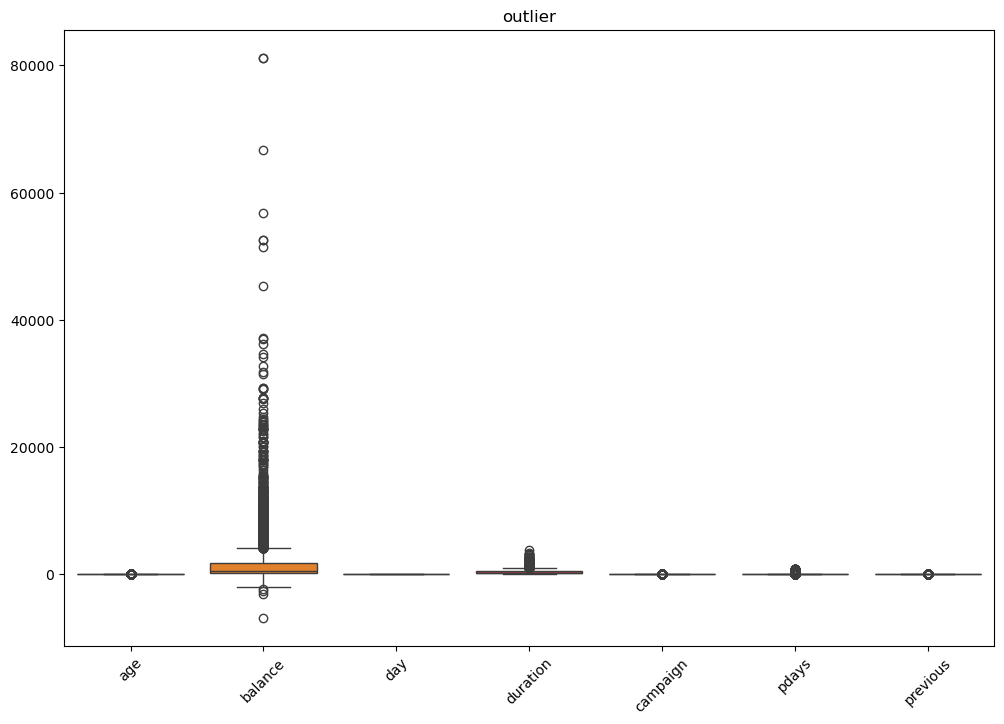

In [17]:
numeric_columns = bank.select_dtypes(include='number').columns

plt.figure(figsize=(12, 8))
sns.boxplot(data=bank[numeric_columns])
plt.xticks(rotation=45)
plt.title('outlier')
plt.show()


In [18]:
outlier_counts = {}
for col in numeric_columns:
    Q1 = bank[col].quantile(0.25)
    Q3 = bank[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
    outlier_count = bank[(bank[col] < lower_bound) | (bank[col] > upper_bound)].shape[0]
    outlier_counts[col] = outlier_count


outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier_Count'])
print(outlier_df)

     Column  Outlier_Count
0       age            171
1   balance           1055
2       day              0
3  duration            636
4  campaign            601
5     pdays           2750
6  previous           1258


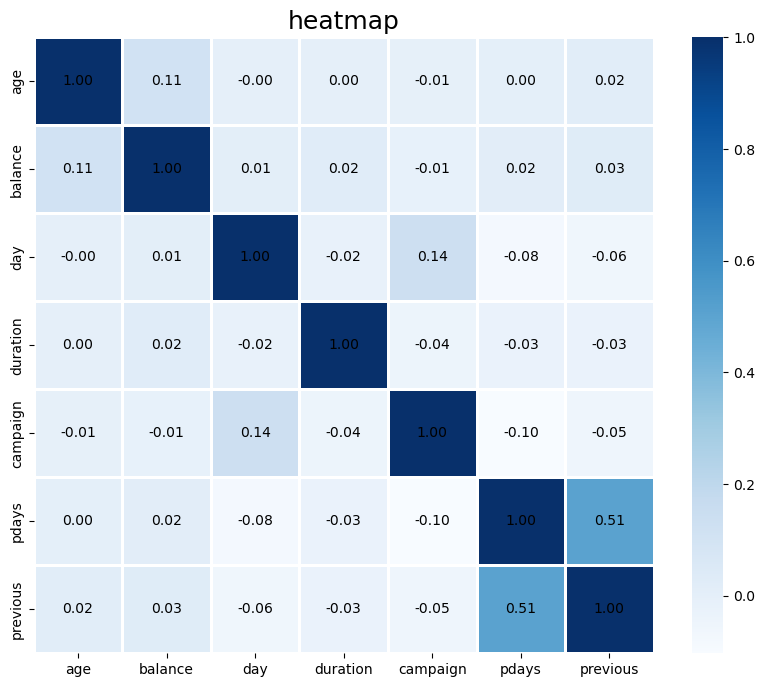

In [19]:
correlation_matrix = bank.corr(numeric_only=True)  
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='Blues',          # 명암 대비가 더 큰 팔레트 사용
            linewidths=1, 
            cbar=True, 
            annot_kws={"size": 10, "color": "black"})  # 더 큰 크기와 굵은 글씨 + 검정색

plt.title('heatmap', fontsize=18)
plt.show()


< 이상치 > </br>
pdays에서 가장 많은 이상치가 나왔고 previous, balance에서도 꽤나 많은 수의 이상치가 보였음을 확인할 수 있었음. </br>
이상치가 전체 데이터의 20% 정도를 차지하고 있기 때문에 제거를 하는 것보다 그대로 가져가되 정규화를 진행해 이상치의 영향을 최소화하는 것이 좋다고 판단. </br>
일단 이상치 영향을 적게 받도록 robustscaler, standardscaler를 사용하기로 결정.
* 훈련 데이터에만 스케일러를 fit하고, 테스트 데이터는 이미 학습된 스케일러로 변환해야함.
* 이러한 방식대로 진행하지 않고 데이터 분할 전에 scaler를 fit할 경우엔 데이터 누수를 발생시켜 모델의 평가가 정확하게 이루어지지 않을 수 있음. 

< 상관관계 > </br>
다른 컬럼들에 비해 pdays와 previous의 상관관계도가 높게 나타났지만 0.51로 그다지 높은 수치는 아님. </br>
때문에 따로 처리해주지 않고 그대로 분석을 진행해도 좋겠다고 판단.

# STEP4. 데이터 전처리

데이터 분할 후 전처리를 진행하기에 앞서 인코딩을 먼저 진행해야함. </br>
* Label Encording : 각 범주를 순차적인 숫자로 매핑. **순서가 있는 범주형 데이터에 적합함.**
* One-Hot Encording : 각 범주마다 이진 변수를 생성. **순서가 없는 범주형 데이터에 적합함.**

전처리는 **인코딩 -> 데이터 분할 -> 정규화** 순서로 진행됨.

In [20]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


One-Hot Encoder : job, marital, default, housing, loan, contact, poutcome, deposit </br>
Label Encoder : education

In [21]:
# 원핫 인코딩 적용 (job, marital, housing, loan, contact, poutcome, deposit)
bank = pd.get_dummies(bank, columns=['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome'], drop_first=True)
# 라벨 인코딩 적용 (education)
label_encoder = LabelEncoder()
bank['education'] = label_encoder.fit_transform(bank['education'])
bank['month'] = label_encoder.fit_transform(bank['month'])
bank['deposit'] = label_encoder.fit_transform(bank['deposit'])
# 숫자형으로 변환 
bank = bank.astype(int)
# 결과 확인
bank.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,deposit,...,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,2343,5,8,1042,1,-1,0,1,...,1,0,0,1,0,0,1,0,0,1
1,56,1,45,5,8,1467,1,-1,0,1,...,1,0,0,0,0,0,1,0,0,1
2,41,1,1270,5,8,1389,1,-1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,55,1,2476,5,8,579,1,-1,0,1,...,1,0,0,1,0,0,1,0,0,1
4,54,2,184,5,8,673,2,-1,0,1,...,1,0,0,0,0,0,1,0,0,1


RobustScaler : age, balance, duration, campaign, pdays, previous </br>
standardScaler : day

In [22]:
bank.columns

Index(['age', 'education', 'balance', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'deposit', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [23]:
data = bank[['age', 'education', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown']]
target = bank['deposit']

In [24]:
train_input, test_input, train_target, test_target = train_test_split(data, target,
                                                                      test_size = 0.2,
                                                                      random_state=42)
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(8929, 30) (8929,)
(2233, 30) (2233,)


In [25]:
# RobustScaler 적용
robust_scaler = RobustScaler()
train_input[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']] = robust_scaler.fit_transform(
    train_input[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]
)
test_input[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']] = robust_scaler.transform(
    test_input[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]
)

# StandardScaler 적용
standard_scaler = StandardScaler()
train_input['day'] = standard_scaler.fit_transform(train_input[['day']])
test_input['day'] = standard_scaler.transform(test_input[['day']])


# STEP 5. 모델링

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_input,train_target)
train_pred = rf.predict(train_input)
test_pred = rf.predict(test_input)

print('Train accuracy : ', accuracy_score(train_target, train_pred))
print('test accuracy : ', accuracy_score(test_target, test_pred))
print('\n classification report:\n', classification_report(test_target, test_pred))
print('\n confusion Matrix:\n', confusion_matrix(test_target, test_pred))

Train accuracy :  1.0
test accuracy :  0.8289296909986565

 classification report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1166
           1       0.81      0.84      0.83      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233


 confusion Matrix:
 [[950 216]
 [166 901]]


In [27]:
from sklearn.model_selection import GridSearchCV
params = {
    'min_samples_split' : range(2,100,10),
    'max_depth' : range(5,10,1)
}
gs = GridSearchCV(RandomForestClassifier(random_state=42), params)
gs.fit(train_input, train_target)
rf = gs.best_estimator_

train_pred = rf.predict(train_input)
test_pred = rf.predict(test_input)

print('Train accuracy : ', accuracy_score(train_target, train_pred))
print('test accuracy : ', accuracy_score(test_target, test_pred))
print('\n classification report:\n', classification_report(test_target, test_pred))
print('\n confusion Matrix:\n', confusion_matrix(test_target, test_pred))

Train accuracy :  0.8639265315264867
test accuracy :  0.8186296462158531

 classification report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1166
           1       0.80      0.83      0.81      1067

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233


 confusion Matrix:
 [[939 227]
 [178 889]]


## XGBoost

In [28]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(train_input, train_target)
train_pred = xgb.predict(train_input)
test_pred = xgb.predict(test_input)

print("Training Accuracy:", accuracy_score(train_target, train_pred))
print("Testing Accuracy:", accuracy_score(test_target, test_pred))
print("\n Classification Report:\n", classification_report(test_target, test_pred))
print("\n Confusion Matrix:\n", confusion_matrix(test_target, test_pred))

Training Accuracy: 0.9641617202374286
Testing Accuracy: 0.8428123600537394

 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      1166
           1       0.82      0.87      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233


 Confusion Matrix:
 [[959 207]
 [144 923]]


In [29]:
params = {
    'max_depth' : range(3, 6, 1),
    'min_child_weight' : range(3,10,1),
    'gamma' : np.arange(0.1, 0.5, 0.1)
}
gs = GridSearchCV(XGBClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)
xgb = gs.best_estimator_

train_pred = xgb.predict(train_input)
test_pred = xgb.predict(test_input)

print('Train accuracy : ', accuracy_score(train_target, train_pred))
print('test accuracy : ', accuracy_score(test_target, test_pred))
print('\n classification report:\n', classification_report(test_target, test_pred))
print('\n confusion Matrix:\n', confusion_matrix(test_target, test_pred))

Train accuracy :  0.8979728973009296
test accuracy :  0.8356471115091805

 classification report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1166
           1       0.81      0.85      0.83      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233


 confusion Matrix:
 [[956 210]
 [157 910]]


## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_input, train_target)
train_pred = dt.predict(train_input)
test_pred = dt.predict(test_input)

print("Training Accuracy:", accuracy_score(train_target, train_pred))
print("Testing Accuracy:", accuracy_score(test_target, test_pred))
print("\n Classification Report:\n", classification_report(test_target, test_pred))
print("\n Confusion Matrix:\n", confusion_matrix(test_target, test_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.7760859829825347

 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      1166
           1       0.77      0.76      0.76      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233


 Confusion Matrix:
 [[920 246]
 [254 813]]


In [31]:
from sklearn.model_selection import GridSearchCV
params = {
    'min_samples_split' : range(2,100,10),
    'max_depth' : range(5,10,1)
}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params)
gs.fit(train_input, train_target)
dt = gs.best_estimator_

train_pred = dt.predict(train_input)
test_pred = dt.predict(test_input)

print('Train accuracy : ', accuracy_score(train_target, train_pred))
print('test accuracy : ', accuracy_score(test_target, test_pred))
print('\n classification report:\n', classification_report(test_target, test_pred))
print('\n confusion Matrix:\n', confusion_matrix(test_target, test_pred))

Train accuracy :  0.8475753163848135
test accuracy :  0.8141513658755039

 classification report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      1166
           1       0.79      0.83      0.81      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.82      0.81      0.81      2233


 confusion Matrix:
 [[933 233]
 [182 885]]


## 모델링 결과

**Random Forest :** </br>
* Train accuracy :  0.8639265315264867
* test accuracy :  0.8186296462158531 
</br>

**XGBoost :** </br>
* Train accuracy :  0.8979728973009296
* test accuracy :  0.8356471115091805
</br>

**Decision Tree :** </br>
* Train accuracy :  0.8475753163848135
* test accuracy :  0.8141513658755039


XGBoost가 가장 높은 Accuracy를 보인 것을 확인할 수 있었음. </br>
때문에 XGBoost를 통해 SHAP를 확인. 

# STEP 6. SHAP

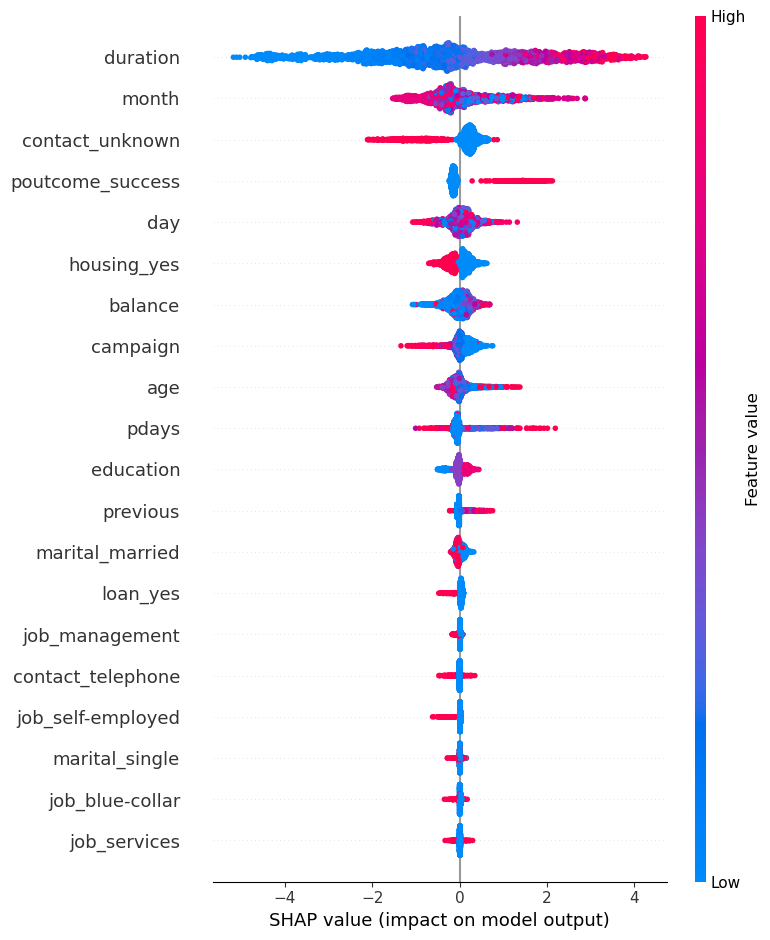

In [33]:
# XGBoost 모델 SHAP에 적용
explainer = shap.Explainer(xgb, train_input)  
shap_values = explainer(test_input)  

# 특성 중요도 (Feature Importance)
shap.summary_plot(shap_values, test_input, plot_type="dot")  

< 주요 변수 해석 >
* Duration : 가장 큰 영향력을 보인 특성. SHAP 값 분포가 넓고 절대값이 큰 샘플이 많음. 전화 통화 시간이 길수록 예금 가입 확률이 높아지는 경향이 있음.
* Month : 두 번째로 큰 영향력을 보인 특성. 값이 클수록 SHAP 값이 대체로 양수이므로 연말에 통화한 고객이 가입 확률이 높음을 알 수 있음.
* Contact_unknown : 연락 방법이 불명확한 경우로 모델이 주로 음수 방향을 예측한 것으로 보아 예금 가입 가능성이 낮음을 알 수 있음.
* Poutcome_success : 이전 캠페인에 성공했던 고객일수록 SHAP 값이 양수이며, 가입 확률이 더 높은 것으로 보임.

< 시사점 >
* Duration이 예금 가입에 가장 큰 영향을 미치므로 상담 품질과 통화 지속 시간을 최적화할 필요가 있음. 
* Month와 Poutcome은 가입 의사에 큰 영향을 주므로, 적절한 시기에 성공 경험이 있는 고객을 우선적으로 타겟팅하는 전략이 필요함.
* Campaign이 지나치게 많으면 부정적인 영향을 주므로, 적정 횟수를 유지하는 것이 좋을 듯함.
* 직업이나 결혼 여부 등의 개인정보들은 영향이 미미한 것으로 보아 마케팅 전략에서는 행동 데이터와 과거 반응에 더 집중할 필요가 있음. 